Data from here

https://www.fca.org.uk/data/complaints-data/firm-level

Lets see what we can find..

FCA colour '#6C1D45'

In [1]:
import pandas as pd
import numpy as np

In [3]:
path = r'firm-level-complaints-data-2021-h1.xlsx'

df = pd.read_excel(path)
df

,Firm name,Firm group,Joint report,Reporting period,"Banking and credit cards (per 1,000 accounts)","Decumulation & pensions (per 1,000 policies in force)","Home finance (per 1,000 balances outstanding)","Insurance & pure protection (per 1,000 policies in force)","Investments (per 1,000 client accounts)"
0,Accord Mortgages Limited,ACCORD MORTGAGES LIMITED,no,01-01-2021 to 30-06-2021,0.49,NaN,4.15,NaN,NaN
1,Acromas Insurance Company Limited,SAGA PLC,no,01-08-2020 to 31-01-2021,NaN,NaN,NaN,1.53,NaN
2,Adrian Flux Insurance Services Group,NO GROUP,no,01-09-2020 to 28-02-2021,NaN,NaN,NaN,1.74,NaN
3,Advanced Payment Solutions Limited,NO GROUP,no,01-10-2020 to 31-03-2021,3.47,NaN,NaN,NaN,NaN
4,Ageas Insurance Limited,AGEAS SA-NV,no,01-01-2021 to 30-06-2021,NaN,NaN,NaN,0.78,NaN
...,...,...,...,...,...,...,...,...,...
194,Volkswagen Financial Services (UK) Limited,NO GROUP,no,01-01-2021 to 30-06-2021,NaN,NaN,NaN,0.12,NaN
195,Yorkshire Building Society,YORKSHIRE BUILDING SOCIETY,no,01-01-2021 to 30-06-2021,0.55,NaN,6.70,0.46,NaN
196,Zopa Bank Limited,NO GROUP,yes,01-01-2021 to 30-06-2021,3.84,NaN,NaN,NaN,2.53
197,Zurich Assurance Ltd,ZURICH INSURANCE GROUP AG,no,01-01-2021 to 30-06-2021,NaN,3.45,NaN,1.21,4.60


### What are the top ten for:- Banking and credit cards (per 1,000 accounts)

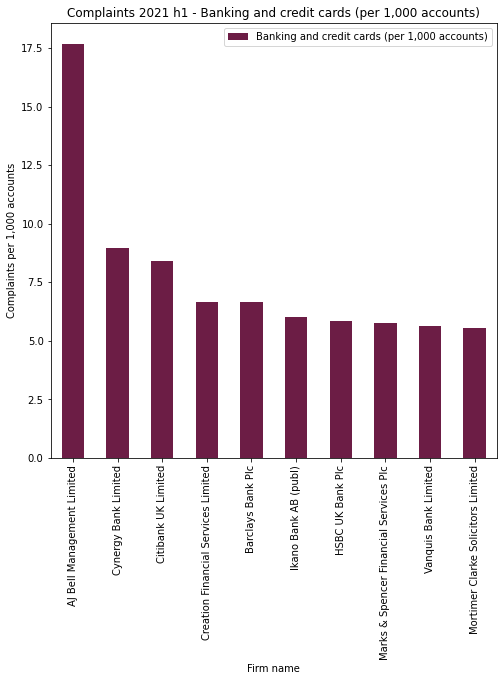

In [23]:
(df.nlargest(10, 'Banking and credit cards (per 1,000 accounts)')
    .iloc[:,:-4]
    .plot.bar(x='Firm name', 
            y='Banking and credit cards (per 1,000 accounts)', 
            title='Complaints 2021 h1 - Banking and credit cards (per 1,000 accounts)', 
            ylabel='Complaints per 1,000 accounts', 
            figsize=(8,8), 
            color=('#6C1D45')));

### Which companies are listed for ALL products?

In [27]:
df.query("`Banking and credit cards (per 1,000 accounts)` > 0 & `Decumulation & pensions (per 1,000 policies in force)` > 0 & `Home finance (per 1,000 balances outstanding)` > 0 ")

,Firm name,Firm group,Joint report,Reporting period,"Banking and credit cards (per 1,000 accounts)","Decumulation & pensions (per 1,000 policies in force)","Home finance (per 1,000 balances outstanding)","Insurance & pure protection (per 1,000 policies in force)","Investments (per 1,000 client accounts)"
28,Bank of Scotland plc,LLOYDS BANKING GROUP PLC,no,01-01-2021 to 30-06-2021,2.20,0.12,8.96,8.31,7.01
52,Coutts & Company,THE ROYAL BANK OF SCOTLAND GROUP,no,01-01-2021 to 30-06-2021,3.62,1.56,7.51,1.50,1.40
89,HSBC UK Bank Plc,HSBC HOLDINGS PLC,no,01-01-2021 to 30-06-2021,5.84,0.20,8.00,0.33,2.14
110,Lloyds Bank PLC,LLOYDS BANKING GROUP PLC,no,01-01-2021 to 30-06-2021,2.70,0.48,8.60,5.63,2.99
122,National Westminster Bank Plc,THE ROYAL BANK OF SCOTLAND GROUP,no,01-01-2021 to 30-06-2021,3.31,3.38,5.92,0.28,1.79
182,The Royal Bank of Scotland Plc,THE ROYAL BANK OF SCOTLAND GROUP,no,01-01-2021 to 30-06-2021,3.00,1.23,10.48,0.50,1.28


### Which Firms have more than one listing for their group?

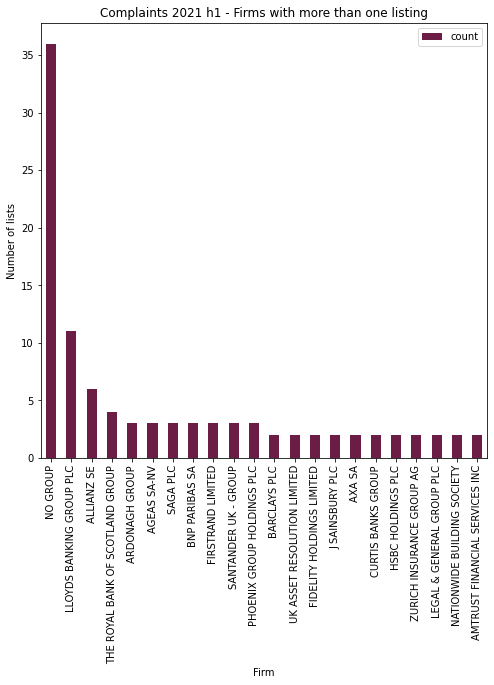

In [40]:
(df['Firm group'].value_counts()
            .reset_index()
            .query("`Firm group` > 1")
            .rename({'index': 'Firm', 'Firm group': 'count'}, axis=1)
            .plot.bar(x='Firm', 
                    y='count', 
                    title='Complaints 2021 h1 - Firms with more than one listing', 
                    ylabel='Number of lists', 
                    figsize=(8,8), 
                    color=('#6C1D45')));